## Environment Setup and Imports

### Library imports

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from nltk import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

### Setup for display window

In [2]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)

### Loading data

In [3]:
critical_df = pd.read_csv("critical-findings-sample-data-20180601-20180901.csv")
critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
1,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
2,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
3,CT,Complete Critical Finding,Acute Vascular Event,HISTORY: left sided weakness<br /><br />TECHNI...
4,CT,Complete Critical Finding,Acute Vascular Event,HISTORY: left sided weakness<br /><br />TECHNI...


In [4]:
non_critical_df = pd.read_csv("non-critical-findings-sample-data-20180601-20180901.csv")
non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CR,None,NaN,STUDY: X-RAY - LEFT HAND<br /><br />REASON F...
1,US,None,NaN,STUDY: VENOUS DOPPLER ULTRASOUND -LEFT UPPER...
2,CR,None,NaN,XR Chest 1 View<br /><br />INDICATION: for com...
3,CR,None,NaN,STUDY: X-RAY CHEST<br /><br />REASON FOR EXA...
4,US,None,NaN,STUDY: VENOUS DOPPLER ULTRASOUND - LEFT LOWE...


### Combining critical and non-critical data

In [5]:
critical_and_non_critical_df = pd.concat([critical_df, non_critical_df], axis=0).reset_index(drop=True)
critical_and_non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
1,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
2,CT,Complete Critical Finding,Significant Vascular Pathology,STUDY: CT CHEST WITH CONTRAST<br /><br />REA...
3,CT,Complete Critical Finding,Acute Vascular Event,HISTORY: left sided weakness<br /><br />TECHNI...
4,CT,Complete Critical Finding,Acute Vascular Event,HISTORY: left sided weakness<br /><br />TECHNI...


In [6]:
critical_and_non_critical_df.tail()

,Modality,Critical_Finding,Category,Data
995,CT,None,NaN,STUDY: CT LUMBAR SPINE WITHOUT CONTRAST<br /...
996,"RG,CT",None,NaN,STUDY: CT ABDOMEN AND PELVIS WITH AND WITHOUT...
997,CR,None,NaN,STUDY: X-RAY CHEST<br /><br />REASON FOR EXA...
998,NM,None,NaN,CLINICAL:<br />74-year-old female with reporte...
999,CT,None,NaN,"HISTORY: --RT FLANK, RLQ PAIN, NAUSEA, FREQ AN..."


## Data Cleaning

### Removing tags

In [7]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.str.replace("<br />", " ").str.lower()
critical_and_non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,study: ct chest with contrast reason for ex...
1,CT,Complete Critical Finding,Significant Vascular Pathology,study: ct chest with contrast reason for ex...
2,CT,Complete Critical Finding,Significant Vascular Pathology,study: ct chest with contrast reason for ex...
3,CT,Complete Critical Finding,Acute Vascular Event,history: left sided weakness technique: ct he...
4,CT,Complete Critical Finding,Acute Vascular Event,history: left sided weakness technique: ct he...


### Removing punctuations

In [8]:
def remove_punctuation(text):
    
    translator = str.maketrans('', '', string.punctuation + "0123456789")
    
    return text.translate(translator)

In [9]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(remove_punctuation)
critical_and_non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest with contrast reason for exa...
1,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest with contrast reason for exa...
2,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest with contrast reason for exa...
3,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head...
4,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head...


### Removing Stopwords

In [10]:
def stop_words(text) :
    
    text = [word for word in text.split() if word not in stopwords.words("english")]
    
    return " ".join(text)

In [11]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(stop_words)
critical_and_non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male years...
1,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male years...
2,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male years...
3,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head ...
4,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head ...


In [12]:
critical_and_non_critical_df.Data[0]

'study ct chest contrast reason exam male years old chest pain esophageal dilation radiation dosage supplied facility ctdivol mgy dlp mgycm technique transaxial imaging performed following intravenous administration ml ml isovue contrast material individualized dose optimization techniques used ct comparison none findings lungs normal demonstrated pleural abnormality normal heart pericardium normal mediastinum normal hilar regions pulmonary emboli present right lower lobe arterial branches normal aorta arch descending thoracic aorta normal osseous structures demonstrated abnormality visualized upper abdomen impression pulmonary emboli present right lower lobe arterial branches evidence acute pulmonary mediastinal pathology'

### Lemmatizing the data

Changing words to their root lemma

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):    
    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [14]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(lemmatizing)
critical_and_non_critical_df.head()

,Modality,Critical_Finding,Category,Data
0,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
1,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
2,CT,Complete Critical Finding,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
3,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head ...
4,CT,Complete Critical Finding,Acute Vascular Event,history left sided weakness technique ct head ...


In [15]:
critical_and_non_critical_df.Data[0]

'study ct chest contrast reason exam male year old chest pain esophageal dilation radiation dosage supplied facility ctdivol mgy dlp mgycm technique transaxial imaging performed following intravenous administration ml ml isovue contrast material individualized dose optimization technique used ct comparison none finding lung normal demonstrated pleural abnormality normal heart pericardium normal mediastinum normal hilar region pulmonary embolus present right lower lobe arterial branch normal aorta arch descending thoracic aorta normal osseous structure demonstrated abnormality visualized upper abdomen impression pulmonary embolus present right lower lobe arterial branch evidence acute pulmonary mediastinal pathology'

### Getting numeric lablels for target variable

In [16]:
critical_and_non_critical_df.Critical_Finding.value_counts()

None                          500
Complete Critical Finding     491
Complete Physician Decline      9
Name: Critical_Finding, dtype: int64

In [17]:
critical_and_non_critical_df.Critical_Finding.replace(["None", "Complete Critical Finding", "Complete Physician Decline"], [0, 1, 1], inplace=True)
critical_and_non_critical_df.head(15)

,Modality,Critical_Finding,Category,Data
0,CT,1,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
1,CT,1,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
2,CT,1,Significant Vascular Pathology,study ct chest contrast reason exam male year ...
3,CT,1,Acute Vascular Event,history left sided weakness technique ct head ...
4,CT,1,Acute Vascular Event,history left sided weakness technique ct head ...
5,CT,1,Immediate Surgical Medical,study ct abdomen pelvis without contrast reaso...
6,CT,1,Immediate Surgical Medical,study ct abdomen pelvis without contrast reaso...
7,CT,1,Immediate Surgical Medical,study ct abdomen pelvis without contrast reaso...
8,CR,1,Unsuspected Injury,study xray chest reason exam male year old sta...
9,CR,1,Unsuspected Injury,study xray chest reason exam male year old sta...


In [19]:
critical_and_non_critical_df.Category.value_counts()

Other                             130
Acute Vascular Event              128
Immediate Surgical Medical         66
Cancer/Neoplasm                    55
Significant Vascular Pathology     52
Infection                          37
Unsuspected Injury                 32
Name: Category, dtype: int64

### Sampling the data

To get good distribution of data for training and testing

In [18]:
critical_and_non_critical_df = critical_and_non_critical_df.sample(frac=1).reset_index(drop=True)
critical_and_non_critical_df.head(15)

,Modality,Critical_Finding,Category,Data
0,MR,1,Cancer/Neoplasm,impressionaddendum typo correction abnormal pr...
1,CTA,0,NaN,small illdefined subpleural airspace opacity s...
2,CR,0,NaN,study xray chest reason exam male month old sh...
3,US,0,NaN,study abdominal ultrasound reason exam male ye...
4,MR,1,Cancer/Neoplasm,impressionaddendum typo correction abnormal pr...
5,CR,1,Other,study xray left elbow reason exam male year ol...
6,CR,1,Other,study xray facial bone reason study male year ...
7,CT,1,Acute Vascular Event,study ct abdomen pelvis contrast reason exam m...
8,CT,1,Acute Vascular Event,study ct brain without contrast reason exam ma...
9,CT,1,Significant Vascular Pathology,study ct abdomen pelvis contrast reason exam f...


### Visualizsing the distribution of words after data cleaning

#### Whole dataset (Critical + Non-critical)

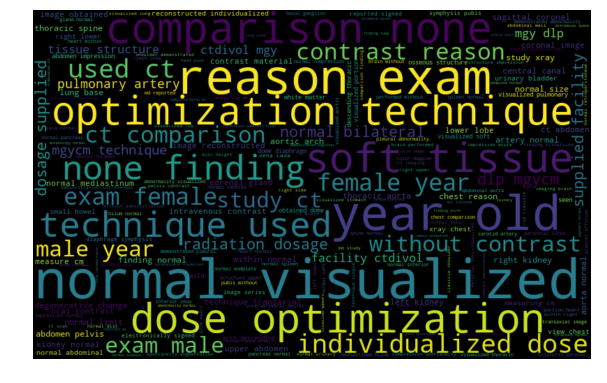

In [20]:
all_words = ' '.join([text for text in critical_and_non_critical_df.Data])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Non-Critical dataset words

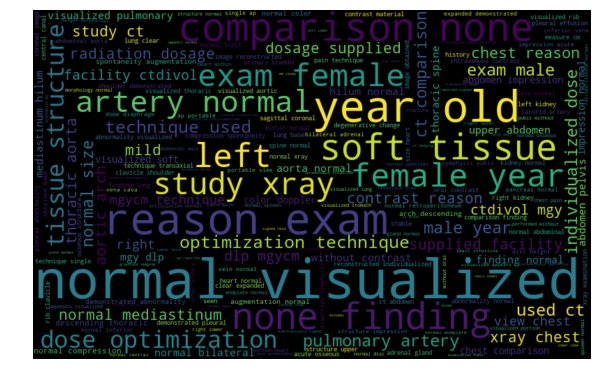

In [21]:
non_critical_finding_words =' '.join([text for text in critical_and_non_critical_df.loc[ critical_and_non_critical_df.Critical_Finding == 0, "Data" ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_critical_finding_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Critical dataset words

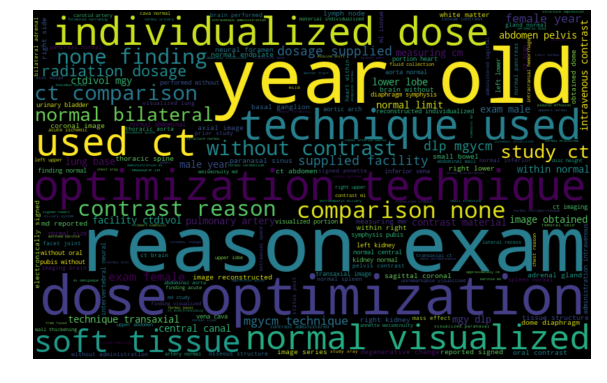

In [22]:
critical_finding_words =' '.join([text for text in critical_and_non_critical_df.loc[ critical_and_non_critical_df.Critical_Finding == 1, "Data" ]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(critical_finding_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Feature extraction

### Features using Tf-Idf

In [182]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, ngram_range=(1, 1), stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(critical_and_non_critical_df.Data)
tfidf_array = tfidf_matrix.todense()
tfidf_array.shape

(1000, 3116)

### Scaling Tf-Idf features

In [ ]:
scaler = MaxAbsScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix)

### Features using BOW

In [49]:
bow_vectorizer = CountVectorizer(max_df=0.90, stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(critical_and_non_critical_df.Data)
bow_array = bow_matrix.todense()
bow_array.shape

(1000, 3116)

### Scaling BOW features

In [ ]:
scaler = MaxAbsScaler()
tfidf_matrix_scaled = scaler.fit_transform(bow_matrix)

## Modeling

### Modeling using Tf-Idf feaures

#### Logistic Regression

In [185]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

lreg_tfidf = LogisticRegression()
lreg_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9666666666666667

#### Cross_val_score for Logistic Regression

In [186]:
cross_val_score(lreg_tfidf, tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.96 , 0.95 , 0.925, 0.915, 0.955])

#### SVM

In [187]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

svc_tfidf = SVC(C=1.0, kernel='linear', degree=3, probability=True)
svc_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = svc_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9766666666666667

#### Cross_val_score for SVM

In [188]:
cross_val_score(svc_tfidf, tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

array([0.95 , 0.96 , 0.945, 0.915, 0.965])

#### MLPClassifier

In [193]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

mlp_clf_tfidf = MLPClassifier([1000, 500, 100], learning_rate_init=0.01, learning_rate='adaptive')
mlp_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = mlp_clf_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9766666666666667

#### Cross_val_score for MLPClassifier

In [172]:
cross_val_score(mlp_clf_tfidf, tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

array([0.96 , 0.965, 0.96 , 0.925, 0.95 ])

#### AdaBoostClassifier

In [201]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

ada_boost_tfidf = AdaBoostClassifier(n_estimators=3000, learning_rate=0.1)
ada_boost_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = ada_boost_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9666666666666667

#### BaggingClassifier

In [202]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

bag_clf_tfidf = BaggingClassifier(n_estimators=3000, n_jobs=-1)
bag_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = bag_clf_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9433333333333334

#### ExtraTreeClassifier

In [206]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

extra_trees_clf_tfidf = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, )
extra_trees_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = extra_trees_clf_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9733333333333334

#### GradientBoostingClassifier

In [210]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

grd_boost_clf_tfidf = GradientBoostingClassifier(n_estimators=3000)
grd_boost_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = grd_boost_clf_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.96

#### RandomForestClassifier

In [212]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

rfr_clf_tfidf = RandomForestClassifier(n_estimators=3000, n_jobs=-1)
rfr_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = rfr_clf_tfidf.predict_proba(xvalid_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9566666666666667

#### Voting Classifier

In [217]:
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

vot_clf_tfidf = VotingClassifier(estimators=[('log_reg', lreg_tfidf), ('ada', ada_boost_tfidf), ('extra_tree', extra_trees_clf_tfidf), ('rfr', rfr_clf_tfidf), ('grd_boost', grd_boost_clf_tfidf)], n_jobs=-1)
vot_clf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

prediction = vot_clf_tfidf.predict(xvalid_tfidf) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
# prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction)

0.97

### Modeling using BOW features

#### Logistic Regression

In [86]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

lreg_bow = LogisticRegression()
lreg_bow.fit(xtrain_bow, ytrain) # training the model

prediction = lreg_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.96

#### Cross_val_score for Logistic Regression

In [118]:
cross_val_score(lreg_bow, bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.965, 0.97 , 0.935, 0.895, 0.95 ])

#### SVM

In [149]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

svc_bow = SVC(C=1.0, kernel='linear', degree=3, probability=True)
svc_bow.fit(xtrain_bow, ytrain) # training the model

prediction = svc_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9666666666666667

#### Cross_val_score for SVM

In [150]:
cross_val_score(svc_bow, bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

array([0.945, 0.95 , 0.935, 0.925, 0.96 ])

#### MLPClassifier

In [173]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

mlp_clf_bow = MLPClassifier([1000, 500, 100], learning_rate_init=0.01, learning_rate='adaptive')
mlp_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = mlp_clf_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.97

#### Cross_val_score for MLPClassifier

In [160]:
cross_val_score(mlp_clf_bow, bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, cv=5)

array([0.95 , 0.95 , 0.94 , 0.925, 0.95 ])

#### AdaBoostClassifier

In [218]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

ada_boost_bow = AdaBoostClassifier(n_estimators=3000, learning_rate=0.1)
ada_boost_bow.fit(xtrain_bow, ytrain) # training the model

prediction = ada_boost_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9566666666666667

#### BaggingClassifier

In [219]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

bag_clf_bow = BaggingClassifier(n_estimators=3000, n_jobs=-1)
bag_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = bag_clf_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9266666666666666

#### ExtraTreeClassifier

In [220]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

extra_trees_clf_bow = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, )
extra_trees_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = extra_trees_clf_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.98

#### GradientBoostingClassifier

In [221]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

grd_boost_clf_bow = GradientBoostingClassifier(n_estimators=3000)
grd_boost_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = grd_boost_clf_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9533333333333334

#### RandomForestClassifier

In [222]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

rfr_clf_bow = RandomForestClassifier(n_estimators=3000, n_jobs=-1)
rfr_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = rfr_clf_bow.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction_int)

0.9766666666666667

#### Voting Classifier

In [223]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_matrix_scaled, critical_and_non_critical_df.Critical_Finding, random_state=42, test_size=0.3)

vot_clf_bow = VotingClassifier(estimators=[('log_reg', lreg_bow), ('ada', ada_boost_bow), ('extra_tree', extra_trees_clf_bow), ('rfr', rfr_clf_bow), ('grd_boost', grd_boost_clf_bow)], n_jobs=-1)
vot_clf_bow.fit(xtrain_bow, ytrain) # training the model

prediction = vot_clf_bow.predict(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.5 # if prediction is greater than or equal to 0.5 than 1 else 0
# prediction_int = prediction_int.astype(np.int)

accuracy_score(yvalid, prediction)

0.97